# Coursework 2: Neural Networks 

This coursework covers the topics covered in class regarding neural networks for image classification.

This coursework includes both coding questions as well as written ones. Please upload the notebook, which contains your code, results and answers as a pdf file onto Cate.

Dependencies: If you work on a college computer in the Computing Lab, where Ubuntu 18.04 is installed by default, you can use the following virtual environment for your work, where relevant Python packages are already installed.

`source /vol/bitbucket/wbai/virt/computer_vision_ubuntu18.04/bin/activate`

Alternatively, you can use pip, pip3 or anaconda etc to install Python packages.

**Note 1:** please read the both the text and code comment in this notebook to get an idea what you are supposed to implement.

**Note 2:** If you are using the virtual environment in the Computing Lab, please run the following command in the command line before opening jupyter-notebook and importing tensorflow. This will tell tensorflow where the Nvidia CUDA libariries are.

`export LD_LIBRARY_PATH=/vol/cuda/9.0.176/lib64/:"${LD_LIBRARY_PATH}}"` 

In [1]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import losses 
import itertools
import cv2

# constants
NUM_CLASSES = 10
classes = [
    "T-shirt/top",
    "Trousers",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

SIDE_LENGTH = 28


## Question 1 (20 points)

Throughout this coursework you will be working with the Fashion-MNIST dataset. If you are interested, you may find relevant information regarding the dataset in this paper.

[1] Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

Be sure that you have the following files in your working directory: data.tar.gz and reader.py. Loading the data can be done as follows:

`from reader import get_images
(x_train, y_train), (x_test, y_test) = get_images()`

The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-D vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 label classes, which are:
* 0: T-shirt/top
* 1: Trousers
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

### 1.1 Load data (6 points)
Load the dataset and print the dimensions of the training set and the test set.

In [2]:
from reader import get_images
(x_train, y_train), (x_test, y_test) = get_images()
print("Training Set Dimensions:")
print("Training set data dimensions: %s" % str(x_train.shape))
print("Training set labels dimensions: %s" % str(y_train.shape))
print("-------------------------------------------------------")
print("Test Set Dimensions:")
print("Test set data dimensions: %s" % str(x_test.shape))
print("Test set labels dimensions: %s" % str(y_test.shape))

Training Set Dimensions:
Training set data dimensions: (60000, 784)
Training set labels dimensions: (60000,)
-------------------------------------------------------
Test Set Dimensions:
Test set data dimensions: (10000, 784)
Test set labels dimensions: (10000,)


### 1.2 Visualize data (6 points)
Visualise 3 training images (T-shirt, trousers and pullover) and 3 test images (dress, coat and sandal).
#### Training images

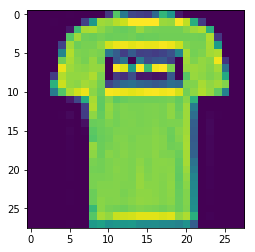

In [3]:
plt.imshow(x_train[1].reshape((SIDE_LENGTH, SIDE_LENGTH)))

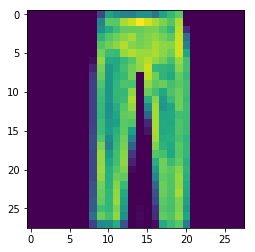

In [4]:
plt.imshow(x_train[16].reshape((SIDE_LENGTH, SIDE_LENGTH)))

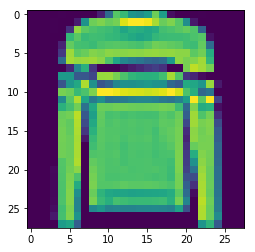

In [5]:
plt.imshow(x_train[5].reshape((SIDE_LENGTH, SIDE_LENGTH)))

#### Test images

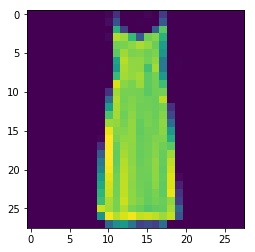

In [6]:
plt.imshow(x_test[13].reshape((SIDE_LENGTH, SIDE_LENGTH)))

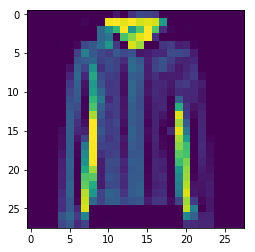

In [7]:
plt.imshow(x_test[6].reshape((SIDE_LENGTH, SIDE_LENGTH)))

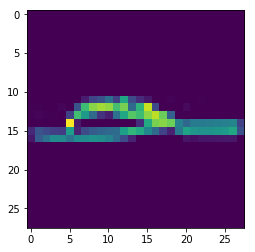

In [8]:
plt.imshow(x_test[8].reshape((SIDE_LENGTH, SIDE_LENGTH)))

### 1.3 Data balance (4 points)
Print out the number of training samples for each class.

In [9]:
frequency_table = [0] * NUM_CLASSES
for label in y_train:
    frequency_table[label] += 1

print("Class Frequency")
for v, i in enumerate(frequency_table):
    print(" %d     %d" % (v, i))

Class Frequency
 0     6000
 1     6000
 2     6000
 3     6000
 4     6000
 5     6000
 6     6000
 7     6000
 8     6000
 9     6000


### 1.4 Discussion (4 points)
Is the dataset balanced? What would happen if the dataset is not balanced in the context of image classification? 

The dataset is balanced because there are the same number of images of each class. If the dataset is not balanced there may be a bias towards some classes. If this bias is not corrected by methods such as oversampling and undersampling, the trained model may give higher probabilities to the classes with more training images resulting in a decrease in overall accuracy.

## Question 2 (40 points)

Build a neural network and train it with the Fashion-MNIST dataset. Here, we use the keras library, which is a high-level neural network library built upon tensorflow.

In [10]:
# Convert the label class into a one-hot representation
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

def preprocess_image(img):
    """
        Normalises the pixel values of the image to the range [0,1]
    """
    max_pixel_value = 255.0
    return img / max_pixel_value

x_train = preprocess_image(x_train)
x_test = preprocess_image(x_test)



### 2.1 Build a multi-layer perceptron, also known as multi-layer fully connected network. You need to define the layers, the loss function, the optimiser and evaluation metric. (30 points)

In [11]:
model = keras.models.Sequential([
  tf.keras.layers.Dense(1000, activation=tf.nn.relu, input_dim=SIDE_LENGTH * SIDE_LENGTH),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


### 2.2 Define the optimisation parameters including the batch size and the number of epochs and then run the optimiser. (10 points)

We have tested that for an appropriate network architecture, on a personal laptop and with only CPU, it takes about a few seconds per epoch to train the network. For 100 epochs, it takes about a coffee break's time to finish the training. If you run it on a powerful GPU, it would be even much faster.

In [12]:
batch_size = 1024
epochs = 200
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/200
60000/60000 [==============================] - 2s 41us/step - loss: 0.7239 - acc: 0.7469
Epoch 2/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.4603 - acc: 0.8404
Epoch 3/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.4165 - acc: 0.8536
Epoch 4/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.3869 - acc: 0.8626
Epoch 5/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.3641 - acc: 0.8698
Epoch 6/200
60000/60000 [==============================] - 2s 36us/step - loss: 0.3490 - acc: 0.8752
Epoch 7/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.3378 - acc: 0.8781
Epoch 8/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.3234 - acc: 0.8834
Epoch 9/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.3173 - acc: 0.8853
Epoch 10/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.3072 - a

60000/60000 [==============================] - 2s 33us/step - loss: 0.1458 - acc: 0.9459: 1s - loss: 0.14
Epoch 79/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.1437 - acc: 0.9454
Epoch 80/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.1409 - acc: 0.9466
Epoch 81/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.1382 - acc: 0.9485
Epoch 82/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.1370 - acc: 0.9487
Epoch 83/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.1364 - acc: 0.9485: 1s - loss: 0.1 - ETA: 0s - loss: 0.1371 - acc: 0
Epoch 84/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.1357 - acc: 0.9490: 1s - loss: 0.
Epoch 85/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.1357 - acc: 0.9492
Epoch 86/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.1365 - acc: 0.9490
Epoch 87/200


60000/60000 [==============================] - 2s 33us/step - loss: 0.0915 - acc: 0.9653
Epoch 156/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.0898 - acc: 0.9661
Epoch 157/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.0870 - acc: 0.9669
Epoch 158/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.0883 - acc: 0.9672
Epoch 159/200
60000/60000 [==============================] - 2s 36us/step - loss: 0.0885 - acc: 0.9662
Epoch 160/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.0894 - acc: 0.9667
Epoch 161/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.0875 - acc: 0.9666
Epoch 162/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.0885 - acc: 0.9660
Epoch 163/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.0875 - acc: 0.9665
Epoch 164/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.088

## Question 3 (20 points) 

Evaluate the performance of your network with the test data. 
Visualize the performance using appropriate metrics and graphs (eg. confusion matrix). 
Comment on your per class performance and how it could be better.

In [13]:
# This function is provided for you to display the confusion matrix.
# For more information about the confusion matrix, you can read at
# https://en.wikipedia.org/wiki/Confusion_matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
        This function prints and plots the confusion matrix.
        
        cm: confusion matrix, default to be np.int32 data type
        classes: a list of the class labels or class names
        normalize: normalize the matrix so that each row amounts to one
        cmap: color map
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### 3.1 Evaluate the classification accuracy on the test set (10 points)

In [14]:
results = model.evaluate(x_test, y_test)
print("Loss: %f" % results[0])
print("Accuracy: %f" %  (results[1] * 100) + '%')

10000/10000 [==============================] - 0s 41us/step
Loss: 0.411332
Accuracy: 90.750000%


### 3.2 Calculate and plot the confusion matrix (10 points)

Confusion matrix, without normalization
[[881   2  13  19   3   1  78   0   3   0]
 [  2 983   0   9   2   0   2   0   2   0]
 [ 19   1 844   7  63   1  65   0   0   0]
 [ 11   6  10 917  27   0  24   0   5   0]
 [  0   0  78  25 820   0  75   0   2   0]
 [  0   0   0   1   0 977   0  16   1   5]
 [123   1  71  23  35   0 738   0   9   0]
 [  0   0   0   0   0   6   0 980   0  14]
 [  5   0   3   3   0   1   3   3 982   0]
 [  0   0   0   0   0   7   1  39   0 953]]


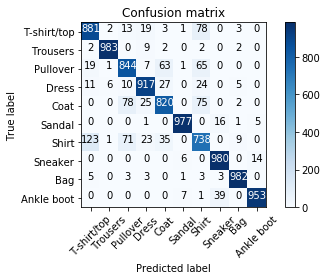

In [15]:
cm = np.zeros(NUM_CLASSES * NUM_CLASSES).reshape((NUM_CLASSES, NUM_CLASSES)).astype(np.int32)
predictions = model.predict(x_test)

for i in range(len(predictions)):
    actual_index = np.argmax(y_test[i])
    predicted_index = np.argmax(predictions[i])
    cm[actual_index][predicted_index] += 1

plot_confusion_matrix(cm, classes)

### 3.3 Comment on your per class performance and how it could be better.

T-shirt/top: This class was correct 88.1% of the time. It was misclassified as a shirt 7.8% of the time.

Trousers: This class was correct 98.3% of the time with few misclassifications.

Pullover: This class was correct 84.4% of the time. It was misclassified as a coat 6.3% of the time and shirt 6.5% of the time.

Dress: This class was correct 91.7% of the time.

Coat: This clase was correct 82.0% of the time. It was misclassified as pullover 7.8% of the time.

Sandal: This class was correct 97.7% of the time with few misclassification.

Shirt: This class was correct 73.8% of the time. It was misclassified as T-shirt/top 12.3% of the time and pullover 7.1% of the time.

Sneaker: This class was correct 98.0% of the time with few misclassification.

Bag: This class was correct 98.2% of the time with few misclassification.

Ankle boot: This class was correct 95.3% of the time with few misclassification.

The items of upper body clothing were often misclassified. This is most likely because they are have similar features such as sleaves. A possibile solution to this would be to use higher resolution images which could have more detail to be able to differentiate from these similar classes.

## Question 4 (20 points)
Take two photos, one of your clothes or shoes that belongs to one of 10 classes, the other that does not belong to any class.

Use either Python or other software (Photoshop, Gimp, or any image editer) to convert the photos into grayscale, crop the region of interest and reshape into the size of 28x28.

### 4.1 Load and visualise your own images (6 points)

#### Visualising trousers

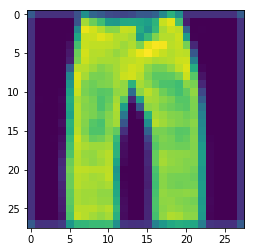

In [16]:
trousers = cv2.imread('trousers.jpg', 0)
plt.imshow(trousers)

#### Visualise shorts

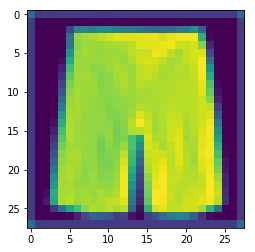

In [17]:
shorts = cv2.imread('shorts.jpg', 0)
plt.imshow(shorts)

### 4.2 Test your network on the two images and show the classification results (10 points)

In [18]:
trousers = preprocess_image(trousers)
prediction = model.predict(trousers.reshape((1,784)))
label = np.argmax(prediction)
print("Prediction: %s \nProbability: %f" % (classes[label], prediction[0][label]))

Prediction: Trousers 
Probability: 1.000000


In [19]:
shorts = preprocess_image(shorts)
prediction = model.predict(shorts.reshape((1,784)))
label = np.argmax(prediction)
print("Prediction: %s \nProbability: %f" % (classes[label], prediction[0][label]))

Prediction: Bag 
Probability: 0.839129


### 4.3 Discuss the classification results and provide one method to improve real life performance of the network (4 points)

The image of the trousers was classified correctly with a very high probability. This is to be expected as trousers had a very high classification accuracy. Surprisingly, the shorts image was classified as a bag even though intuitively, it shares the most similar features to trousers. As it is more rectangular and the line dividing the legs is not very pronounced, it is understandable why it would get confused with a bag.

One way to improve the performance of the model would be to apply random transformations on the images during the training phase. This would include flipping, rotating, shearing, cropping and translational shifting the image before the forward pass through the network. By augmenting the data in this way, we can effectively increase the dataset size by introducing more data points. This will result in a more accurate model. 

## 5. Survey
How long did the coursework take you to solve? 

8 hours